In [1]:
# Copyright (c) 2019 Skymind AI Bhd.
# Copyright (c) 2020 CertifAI Sdn. Bhd.
#
# This program and the accompanying materials are made available under the
# terms of the Apache License, Version 2.0 which is available at
# https://www.apache.org/licenses/LICENSE-2.0.
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS, WITHOUT
# WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the
# License for the specific language governing permissions and limitations
# under the License.
#
# SPDX-License-Identifier: Apache-2.0

# Statistics and Probability: Fundamentals

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

# Standardisation

We consider the grades dataset, which contains Physics, Biology and Maths scores for 26 students:

In [3]:
grades = pd.read_csv("https://archive.org/download/ml-fundamentals-data/machine-learning-fundamentals-data/grades.csv")
print(grades.shape)
grades.agg(["mean", "var", "std"])

(26, 4)


,Physics,Biology,Maths
mean,63.769231,67.038462,69.769231
var,517.224615,456.758462,300.664615
std,22.742573,21.371908,17.339683


In [7]:
grades.describe()

,Physics,Biology,Maths
count,26.000000,26.000000,26.000000
mean,63.769231,67.038462,69.769231
std,22.742573,21.371908,17.339683
min,12.000000,20.000000,32.000000
25%,46.250000,56.000000,60.000000
50%,63.000000,66.000000,68.500000
75%,79.500000,78.000000,83.500000
max,98.000000,98.000000,99.000000


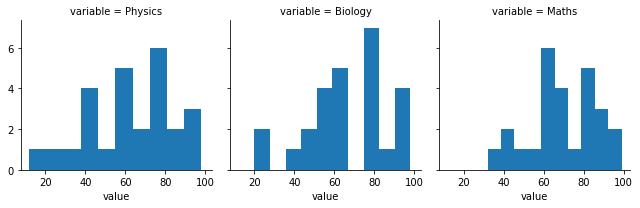

In [8]:
g = sns.FacetGrid(grades.melt("Name"), col="variable")
g.map(plt.hist, "value")

Suppose the instructor wanted to provide the students with an idea of how well they are performing relative to their peers, but not their exact score. This can be done by **standardising** the scores. This is done by subtracting the mean and re-scaling the data to be in units of standard deviations.  

In [9]:
grades["Physics_std"] = (grades["Physics"] - grades["Physics"].mean()) / grades["Physics"].std()

In [10]:
grades.head()

,Name,Physics,Biology,Maths,Physics_std
0,Arnold,80,78,70,0.713673
1,Bob,60,98,45,-0.165735
2,Cassandra,34,56,65,-1.308965
3,Donovan,56,65,32,-0.341616
4,Emily,98,23,55,1.505141


What can we conclude? 

Firstly, Arnold and Emily are above average Physics students, whereas Bob, Cassandra and Donovan are below average. 

Also, Emily's scores are **1.5 standard deviations above the mean**, whereas Cassandra's scores are **1.3 standard deviations below the mean**. 

More importantly, standardisation allows us to compare the results from different exams. Standardisation allows each of the variables to be expressed in common units: their respective standard deviation. 

We can do the same for Math scores, which have a lower variance than Physics scores: 

In [11]:
grades["Maths_std"] = (grades["Maths"] - grades["Maths"].mean()) / grades["Maths"].std()
grades.head()

,Name,Physics,Biology,Maths,Physics_std,Maths_std
0,Arnold,80,78,70,0.713673,0.013309
1,Bob,60,98,45,-0.165735,-1.428471
2,Cassandra,34,56,65,-1.308965,-0.275047
3,Donovan,56,65,32,-0.341616,-2.178196
4,Emily,98,23,55,1.505141,-0.851759


What do we observe? 

 - While Arnold is doing really well in Physics, he's barely above average in Maths. 
 - Bob, Cassandra and Donovan are below average in both Physics and Maths. 
 - While Emily seems to be an above average Physics student, she's quite the opposite when it comes to Maths. 

# Fundamentals of Probability

For your reference, the rules of probability are reproduced as follows: 
1. The probability of an event A is between 0 and 1 (inclusive): $0 \leq p(A)\leq 1$
2. The sum of the probability of all possible events (the *sample space*) is 1. $\Sigma^n_{i=0} p(A_i)=1$
3. The sum of the probability of an event and its complement is 1. $p(A^C)+p(A) = 1$
4. (Addition Rule) The probability of event A *or* event B happening is equal to the sum of the probabilities of event A and event B happening respectively, *less* the probability of event A **and** event B. $p(A \cup B)= p(A) + p(B) - p(AB)$
5. (Multiplicative Rule) If events A and B are independent, then the probability of event A and B jointly occuring is the product of the probabilities of events A and B respectively. $p(AB) = p(A)p(B)$

<div class="alert alert-info">
📝 <b>Note:</b> Events A and B are independent if the occurence of event A doesn't change the likelihood of Event B occuring. Do not confuse this with <b>mutually exclusive</b> events. If events A and B are mutually exclusive (disjoint), they cannot both happen. 
</div>

## Conditional Probability 
|Sex/Handedness|Right handed| Left handed|
|--------------|-----------:|-----------:|
|Male          |43          | 9          |
|Female        |44          | 4          |

The contingency table above summarises some fake data collected from 100 respondents on genders and handedness. 

**What is the probability that any one respondent in our survey is female?** To calculate the probability, divide the number of events by the sample space: $\frac{44+4}{100}=0.48$. It is a little more likely that our respondents are male than female. 

However, what is the probability that a female in our sample is **left-handed**? Quite unlikely. To quantify the likelihood, we could divide the number of left-handed females by the number of females in our sample: $\frac{4}{48}=\frac{1}{12}$. 

$\frac{1}{12}$ is a **conditional probability**: a probability under a condition. Note that to calculate the conditional probability, we restrict the sample space under consideration to a condition, and then recalculate the probability as if the condition were the entire sample space. 

A general formula for conditional probability is as follows. The conditional probability of A given B is 

$$P(A|B)=\frac{P(A\cap B)}{P(B)}$$

We take the joint probability $P(A\cap B)$ and 'inflate' it with the probability of $P(B)$. 

Conditional probabilities are fundamental to the idea of **independence**. Recall that we defined independence of two events A and B as 

> the probability of event A is not changed by the occurence of event B. 

We can restate the definition above as 

$$P(A|B)=P(A)$$

Consider whether handedness is independent of sex. The probability of being left-handed is $11/100$, or 0.11. As you might expect, it's close to the conditional probability $P(left$-$handed|female)=0.12$. 

## Law of Total Probability

Let $A_1, \dots A_n$ be mutually exclusive and exhaustive events, where $P(A)\neq 0$ for all $A$. Then, the probability of $P(B)$ can be defined as 

$$P(B)=\sum^n_{i=1}P(B|A_i)P(A_i)$$

### Example 

The probability that any given person in the population has a disease is 0.1. The likelihood of testing positive for a disease if you have it is 0.95. The probability of testing positive in the absence of the disease (a false positive) is 0.10. 

What is the probability of testing positive for the disease? 

$$P(T = 1|D = 1) = 0.95$$
$$P(T = 1|D = 0) = 0.10$$
$$P(D = 1) = 0.1$$


$$\begin{align}
P(T=1)&=P(T=1|D=1)P(D=1) + P(T=1|D=0)P(D=0)\\
&= 0.95\times 0.1 + 0.10*0.90\\
&=0.14
\end{align}$$

# Bayes' Theorem

$$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$$

$$Posterior=\frac{Likelihood\times Prior}{Evidence}$$

An informal way of putting Bayes' Theorem: 

$$P(pred|data)=\frac{P(data|actual)P(actual)}{P(data)}$$

The proof for Bayes' Theorem follows from the definition of conditional independence. We know that 

$$\begin{align}
P(A\cap B)&=P(A|B)\times P(B)\\
&=P(B|A)\times P(A)
\end{align}$$

This can be rearranged to state Bayes's Theorem: 

$$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$$



## Example 1

You want to go for a picnic today but it is cloudy in the morning. From experience, you know that:

- the probability of raining on any given day is 10%, 
- the probability that it is cloudy on any given day is 40%, and 
- 50% of all rainy days start off cloudy. 

What is the probability of raining given that it is cloudy?

$P(Rain | Cloud) = \frac {P(Cloud | rain) \times P(rain)}{P(Cloud}=\frac{0.5\times 0.1}{0.4}=0.125$


## Example 2

The probability that any given person in the population has a disease is 0.1. The likelihood of testing positive for a disease if you have it is 0.95. The probability of testing positive in the absence of the disease (a false positive) is 0.10. 

If you have been tested positive for a disease. What is the probability that you actually have the disease? 

What is the probability of actually getting the disease given tested positive?

$$P(T = 1|D = 1) = 0.95$$
$$P(T = 1|D = 0) = 0.10$$
$$P(D = 1) = 0.1$$

As we've done earlier, we can use the law of total probability to find $P(T=1)$: 

$$\begin{align}
P(T=1)&=P(T=1|D=1)P(D=1) + P(T=1|D=0)P(D=0)\\
&= 0.95\times 0.1 + 0.10*0.90\\
&=0.14\end{align}$$

Note that $$P(T = 1|D = 1) = 0.95$$ is the likelihood and $$P(D = 1) = 0.1$$ is the prior. 


$\begin{align}
P(D=1|T=1)&=\frac{P(T=1|D=1)P(D=1)}{P(T=1)}\\
&=\frac{0.95\times 0.1}{0.14}\\
&=0.68
\end{align}$

# Probability Distributions 
A random variable is a variable whose possible values are the outcomes of a non-deterministic process. 

## Random variables 
- A **continuous random variable** takes on infinitely many values/real numbers. In fact, the probability of a continuous random variable taking on any one value is 0. 
- A **discrete random variable** takes on a finite set of values, e.g. counts.

## Binomial distribution

We start with the **binomial distribution**. The binomial distribution models the probability of $k$ successes in $n$ independent trials. 

Let's redo the lecture example with `scipy`. Import the `binom` class from `scipy.stats`: 

In [12]:
from scipy.stats import binom

If the chance of winning a game is 0.75, what is the probability of losing all 5 games?

Assume the chance of winning each game is independent. Then we can solve this problem using the binomial distribution. 

We use the `.pmf` method of the `binom` class. `pmf` stands for **probability mass function**: a function that states the probability that a discrete random variable is equal to any one value. 

In [13]:
# k is the number of event (losing game 5 times)
# n is the sample size (5 games)
# p is the probability of event (losing in a game = 25%)

binom.pmf(k=5, n=5, p=0.25)

0.0009765625

The answer is what we should expect. If we win 3 in 4 games, it's unlikely we lose 5 in 5 games. 

Now, suppose we want to know what is the probability of winning 3 games or less. We want to find $P(X \leq 3)$. 

Note $P(X \leq 3) = P(X=0)+ P(X=1)+P(X=2)+P(X=3)$. 

By the **complement rule**, $P(X \leq 3) = 1 - P(X=5)-P(X=4)$. 



In [14]:
1 - binom.pmf(k=4, n=5, p=0.75) - binom.pmf(k=5, n=5, p=0.75)

0.36718749999999994

Note that we could also answer this by referring to the value of the **cumulative density function** at $X=3$. 

The cumulative density function, $F(x)$, is defined as 

$$F(x)=P(X\leq x)$$

In [15]:
binom.cdf(3, n=5, p=0.75)

0.3671875

## Normal distribution

We move on to the **normal distribution**. There are some key properties that are important to know about this distribution: 

- The mean, median and mode of the distribution is the same.
- The curve is bell-shaped.
- The total area under the curve is 1.
- Symmetric about the mean.

There are two key **shape parameters** that define the location and spread of the normal distribution: the mean, commonly denoted as $\mu$; and the standard deviation, commonly denoted as $\sigma$. 

Again, start by importing the `norm` class from `scipy.stats`: 

In [16]:
from scipy.stats import norm

### Standard normal distribution

A normally distributed random variable with mean 0 and standard deviation 1 is said to follow the standard normal distribution, also known as the **z-distribution**. 

A normally distributed random variable can be converted into the standard normal distribution by standardisation: 

$$Z = \frac{X-\mu}{\sigma}$$

<div class="alert alert-info">
    <b>Note:</b> The <code>.pdf</code> method refers to the <b>probability density function</b>, which is the counterpart of the probability mass function for continuous random variables. 
</div>

Text(0.5, 1.0, '$\\mu$ and $\\sigma$ affect the shape of the normal distribution')

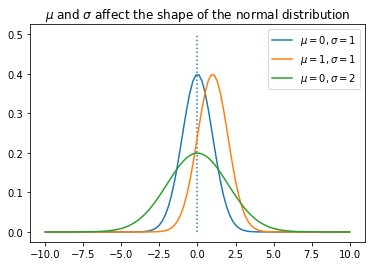

In [18]:
x = np.linspace(-10, 10, 100)
f1 = norm.pdf(x, loc=0, scale=1)
f2 = norm.pdf(x, loc=1, scale=1)
f3 = norm.pdf(x, loc=0, scale=2)

plt.plot(x, f1, label="$\mu=0, \sigma=1$")
plt.plot(x, f2, label="$\mu=1, \sigma=1$")
plt.plot(x, f3, label="$\mu=0, \sigma=2$")
plt.vlines(x=0, ymin=0, ymax=0.5, linestyles="dotted")

plt.legend()
plt.title("$\mu$ and $\sigma$ affect the shape of the normal distribution")

With continuous distributions, we do not want to find the probability of a random variable at any given value. Since the range is infinite, the probability that a continuous random variable takes on any given value is zero. 

We are usually interested in finding out the probability that the random variable lies between two values. 



### Programmatic solutions: percent point function

Recall the definition of the **cumulative density function**: 

$$F(x)=P(X\leq x)$$

The CDF returns the probability that a random variable is less than $x$. For instance, because of the symmetric shape of the normal distribution, the CDF of the standard normal distribution at 0 is expected to be 0.5. 

In [19]:
norm.cdf(0)

0.5

We will also use the **percent point function**, available via the `ppf()` method. The percent point function does the inverse of the cumulative density function. It returns the percent point given the value of the CDF: 

In [20]:
norm.ppf(0.5)

0.0

### Standard deviation rule/empirical rule 

A useful rule of thumb is the **standard deviation rule**, or empirical rule. 

This rule states that for a normally distributed random variable, 
- 68% of data lies within 1 standard deviation of the mean.
- 95% of data lies within 2 standard deviations of the mean, and 
- 99.7% of data lies within 3 standard deviations of the mean.

### Example: height

Maalysian males' heights are normally distributed with mean 169.57 and standard deviation 7.57. Answer the following questions programmatically and using the empirical rule. 

- 84% of Malaysians have height of less than ... cm. 

In [21]:
norm.ppf(0.84, loc=169.57, scale=7.57)

177.09804617589782

In [22]:
169.57 + 7.57

177.14

- The tallest 2.5% of Malaysians are taller than ... cm 

In [23]:
norm.ppf(0.975, loc=169.57, scale=7.57)

184.4069273629682

In [24]:
169.57 + 2 * 7.57

184.70999999999998

- The shortest 0.15% of Malaysians are shorter than ... cm

In [25]:
norm.ppf(0.0015, loc=169.57, scale=7.57)

147.10422390516268

In [26]:
169.57 - 3 * 7.57

146.85999999999999

## Poisson distribution

The Poisson distribution models the number of events that occur in a fixed time interval. 

Use the Poisson distribution when: 
- events occur at random points of time and space, and
- our interest lies is the number of occurrences of the event.

The most important property of the Poisson variable is that the waiting time between events is **memoryless**: 
- the time when events occur do not affect the number of successes in an interval;  
- only the length of time affects the number of successes.

The Poisson distribution has a single parameter: lambda ($\lambda$). The mean and variance of the Poisson distribution coincides with the shape parameter $\lambda$. 

The probability mass function of the Poisson distribution is as follows:

$$p(X=k) = \frac{e^{-\lambda}\lambda^{k}}{k!}$$

In [27]:
from scipy.stats import poisson

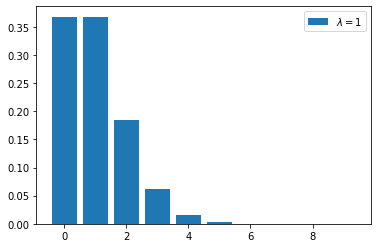

In [28]:
# a Poisson distribution with lambda=1 can be interpreted as: 
# on average, 1 event occurs within the set time interval. 
# naturally, it is less likely that more than 1 event occurs. 

x = np.arange(10)
f1 = poisson.pmf(x, mu=1)
f2 = poisson.pmf(x, mu=2)
f3 = poisson.pmf(x, mu=3)

plt.bar(x, f1, label="$\lambda=1$")
plt.legend()


In [29]:
# the average can be calculated by multiplying the inputs with the values of the PMF
x @ f1
# see that this is equal to lambda 

0.999998874797402

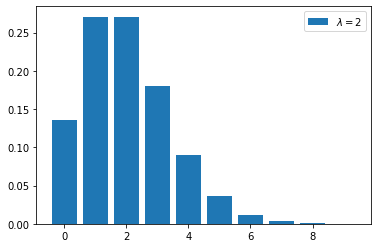

In [30]:
# for lambda=2, having 2 events is a lot more likely

plt.bar(x, f2, label="$\lambda=2$")
plt.legend()

In [31]:
x @ f2

1.999525105343477

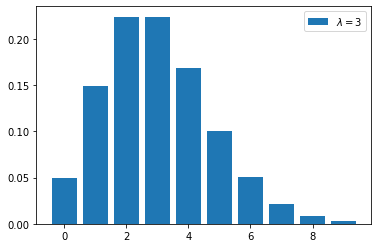

In [32]:
plt.bar(x, f3, label="$\lambda=3$")
plt.legend()

In [33]:
x @ f3

2.9885910238149727

## Example

Suppose emergency calls per hour follow a Poisson distribution and occur at a rate of 5 calls per hour. What is the probability of receiving 3 calls in any given hour? 

In [38]:
poisson.pmf(3, mu = 5)

0.1403738958142805

# Central Limit Theorem

The Central Limit Theorem helps us reason about realisations of sample means. 

Specifically, it tells us that in many repeated samples, the distribution of the sample means of a random variable is normal regardless of the underlying population distribution. 

In [35]:
from scipy.stats import poisson

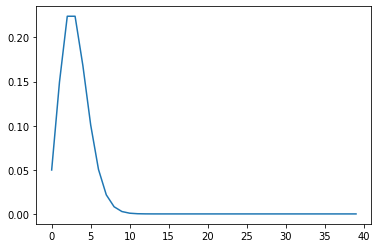

In [39]:
bins = np.arange(0, 40)
p_pois = poisson.pmf(bins, mu=3)
plt.plot(bins, p_pois)

(array([ 1.,  3., 25., 68., 72., 95., 81., 38., 12.,  5.]),
 array([1.7 , 1.94, 2.18, 2.42, 2.66, 2.9 , 3.14, 3.38, 3.62, 3.86, 4.1 ]),
 <BarContainer object of 10 artists>)

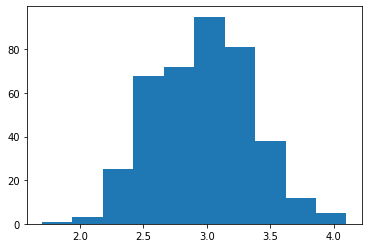

In [40]:
def sample_pois(_): 
    samples = poisson.rvs(mu=3, size=20)
    return np.mean(samples)

means = list(map(sample_pois, np.arange(400)))
plt.hist(means)

# Statistic and Probability in Deep Learning - Using Normal Distribution in Weight Initialization

**Normal Distribution** could be very helpful when it comes to weight initialization of deep learning task.

In deep neural network, we may encounter vanishing/exploding gradients when the derivaties become very small or very big. The activations and derivatives will be decreased/increased exponentially as a function of number of layers. This will make training difficult, especially when gradients are exponentially smaller, then gradient descent wiill take tiny little steps. Consequently it will take a long time for gradient descent to learn anything.

Therefore, using a normal distributed weight initiallization with mean equals to 0 and a standard deviation of 1 could be helpful in resolving the issue.

For example, when we using ReLU as our activation function, we would do the following steps:

- Generate random sample of weights from a Normal Distribution having mean equals 0 and a standard deviation of 1.
- Multiply the sample with $\sqrt{(\frac{2}{n_i})}$, where $n_i$ is number of input units for that layer.

```np.random.rand(shape) * np.sqrt(2/n[l-1])```, where `l` is the total number of input units.

> This initialization is also called **Xavier Initialization**.

This sort of initialization helps to set the weight matrix neither too bigger than 1, nor too smaller than 1. Thus it doesn’t explode or vanish gradients respectively.